In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path=r'E:\data files\\Visadataset.csv'
vdf=pd.read_csv(path)

In [3]:
cat_column=vdf.select_dtypes(include='object').columns
num_column=vdf.select_dtypes(exclude='object').columns

**BI variate analysis**

- we have already seen uni variate analysis

- we performed cat column analysis

    - bar chart
    
    - frequency table
    
    - relative frequency(value count)
    
    - pie chart
    
- we performed num analysis

    - histogram
    
    - box plot
    
    - distribution plots
    
    - outlier analysis
    
    - filling the outliers
    
- now we will do cat-cat analysis

- num-cat analysis

- num num analysis

In [ ]:
**cat-cat**
- lets consider two columns

    - continent
    
    - case status

In [6]:
# continent
vdf['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
vdf['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find certified observation continent wise

- find the denied observation continent wise

In [8]:
# 1 make first cond continent==asia
# 2 make second condition case_stats==certified
# 3 make 3rd con con1 and con2
# 4 retrive df and take count

c1=vdf['continent']=='Asia'
c2=vdf['case_status']=='Certified'
c3=c1&c2
vdf[c3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [13]:
c=vdf['continent'].unique()

In [12]:
vdf['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [15]:
co=c.tolist()
co

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']

In [42]:
df1=pd.DataFrame()
for i in co:
    con1=vdf['continent']==i
    con2=vdf['case_status']=='Certified'
    con3=con1 & con2
    count1=len(vdf[con3])
    count2=len(vdf[~con3 & con1])
    df2 = pd.DataFrame({'Continent': [i], 'Certified_Count': [count1],'non_certified':[count2]})
    df1 = pd.concat([df1, df2], ignore_index=True)
df1

,Continent,Certified_Count,non_certified
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


      continents  certified  denied
0           Asia      11012    5849
1         Africa        397     154
2  North America       2037    1255
3         Europe       2957     775
4  South America        493     359
5        Oceania        122      70


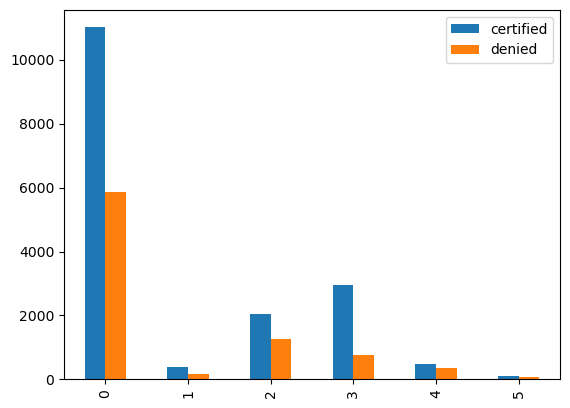

In [43]:
cert,den=[],[]
for i in co:
    con1=vdf['continent']==i
    con2=vdf['case_status']=='Certified'
    con3=con1 & con2
    cert.append(len(vdf[con3]))
    den.append(len(vdf[~con3 & con1]))
df = pd.DataFrame({'continents': co,'certified': cert,'denied': den})
df.plot(kind='bar')
print(df)

**cross tab**

- above df we can make using a method **cross tab**

- availabe in pandas

- takes two arguement 1 index another column

- in above df index column is continent

- df data column is case status

In [41]:
df4=pd.crosstab(vdf['continent'], vdf['case_status'])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

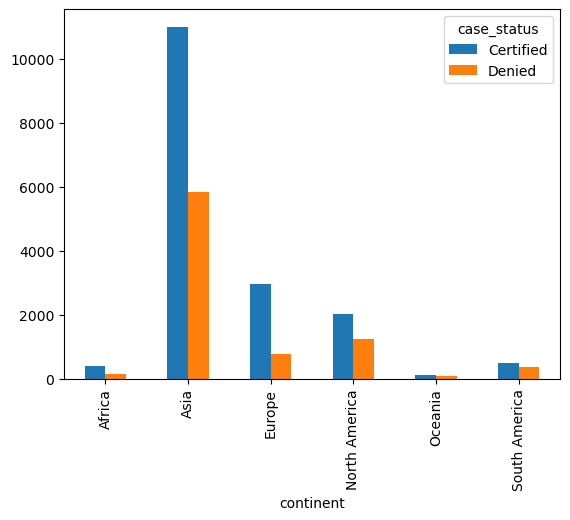

In [38]:
df4.plot(kind='bar')

In [ ]:
**multivariate**

-- here cross tab

- fixed 1 column

- take other columns in a list

In [44]:
icolumn=vdf['continent']
datacolumn=[vdf['education_of_employee'],vdf['case_status']]
df5=pd.crosstab(icolumn,datacolumn)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

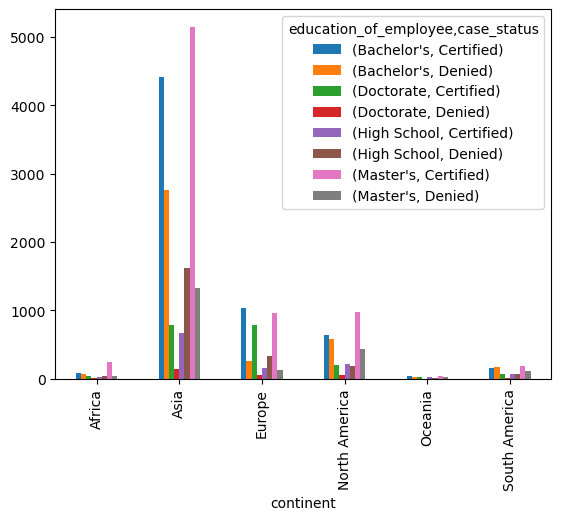

In [45]:
df5.plot(kind='bar')

**num- num analysis**

-  to understand numerical column relation we need to plot scatter plot

- it gives the relation between two numerical column

- bar chart - pie chart - histogram - scatter plot

- scatter plot under matplot lib package

- **plt.scatter**

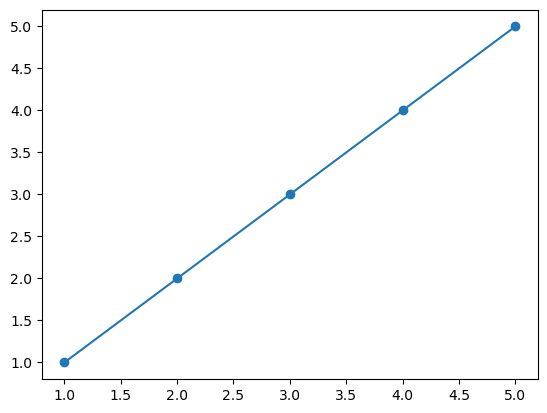

In [6]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

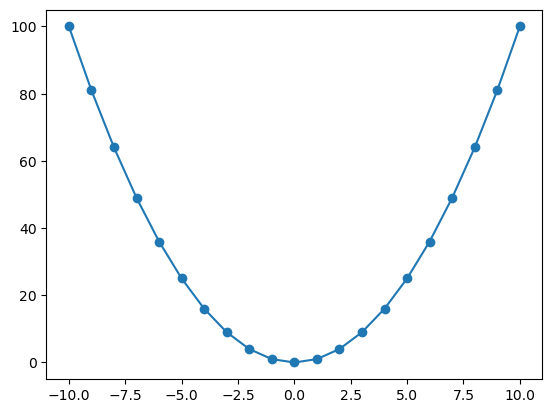

In [12]:
# plt the parabola

x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)

In [13]:
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

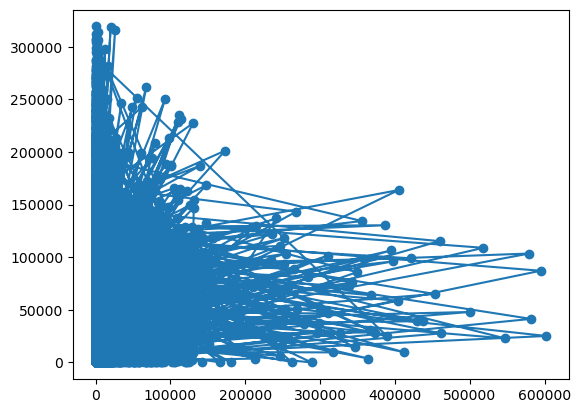

In [15]:
x=vdf['no_of_employees']
y=vdf['prevailing_wage']
plt.scatter(x,y)
plt.plot(x,y)

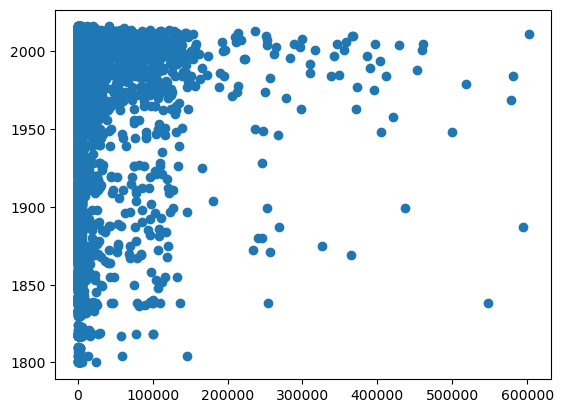

In [18]:
x=vdf['no_of_employees']
y=vdf['yr_of_estab']
plt.scatter(x,y)
#plt.plot(x,y)

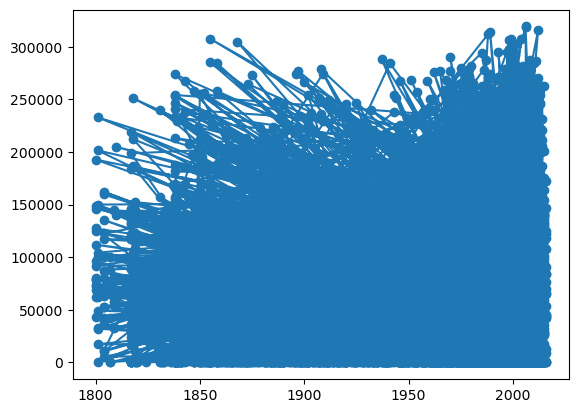

In [17]:
x=vdf['yr_of_estab']
y=vdf['prevailing_wage']
plt.scatter(x,y)
plt.plot(x,y)


- **covariance**

    - covariance will tell about wether the columns have relation or noit

    - covariance will explain about corelation status i.e +ve , -ve or no-relation
    
-**correlation**

    - it tells about how much relation between two variables
    
    - it denotes with **r**
    
    - r varies from -1 to 1
    
    - -1 to 0 indicates -ve relation quantity
    
    - o-1 indicates +ve relation
    
    - 0 means no relation

** method name is corr**

In [21]:
vdf.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [23]:
r=vdf[num_column].corr()

**HEAT MAP**

- it is one of the important visualization method to show the matix form of values

- it is under seaborn package

- in every matrix we have haighest value and lowest value

- it will give color visualization also it provides color bar(which color indicates which value)

**sns.heatmap**

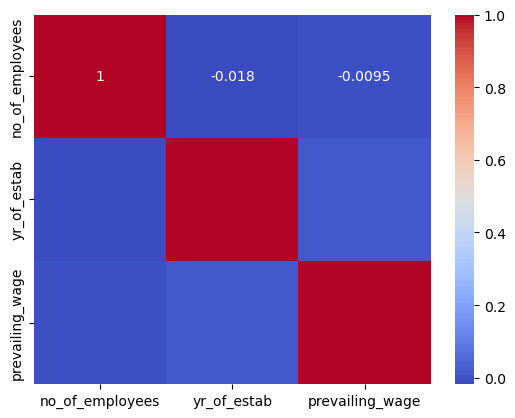

In [31]:
sns.heatmap(r,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
- by seeing the graph we we might not say the relation status

- it is best practice get the percent of relation using corelation

- all 3 cols having approx 0 percent of relation

- no relation means independent of each other

- corr method gives matrix view

- we have 3 columns so 3*3 = 9 fields

- if a data has 20 column then 20*20 total 400 fileds

- thats always go with heat map visua;iztion